# Linear Regression Project - Solutions
Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

## یک فروشگاه در شهر نیویورک وجود دارد که لباس میفروشد. هم به صورت آنلاین فروش لباس دارد و هم به صورت حضوری به مشتریان مشاوره میدهد. مشتریان به فروشگاه می آیند و در جلسه مشاوره فردی شرکت میکنند و سپس به خانه میروند و از طریق گوشی موبایل یا سایت اقدام به خرید میکنند.


The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

## شرکت مد نظر میخواهد ببیند که آیا بهتر است روی اپلیکیشن وقت بگذارد یا روی وبسایت خودش

They've hired you on contract to help them figure it out! Let's get started!
### reference:
https://github.com/monahatami1/monogram1/blob/master/notebook2-week8-Linear%20Regression%20Project%20-%20Solutions.ipynb


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Get the Data
We'll work with the Ecommerce Customers csv file from the company.
It has Customer info, suchas Email, Address, and their color Avatar. 

Then it also has numerical value columns:

## یک فایل دیتا دراختیار داریم که درآن اطلاعات مشتریان وجود دارد. اطلاعاتی مانند ایمیل و ادرس و  رنگ آواتار آنها

Avg. Session Length: Average session of in-store style advice sessions.
## متوسط زمان حضور در جلسه مشاوره

Time on App: Average time spent on App in minutes
## متوسط زمان حضور در اپلیکیشن


Time on Website: Average time spent on Website in minutes
## متوسط زمان حضور در وبسایت

Length of Membership: How many years the customer has been a member.
## مدت زمانی (قدمت) که مشتری این شرکت است


 Yearly Amount Spent
 ## مقدار دلاری که به صورت سالانه در این فروشگاه خرج  میشود
Read in the Ecommerce Customers csv file as a DataFrame called customers.


In [5]:
customers = pd.read_csv("Ecommerce Customers.csv")


In [6]:
#Check the head of customers, and check out its info() and describe() methods.
customers.head()



Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

## خوشبختانه دیتای ترو تمیزی داریم- هشت ستون دارد و هر ستون پانصد داده که یعنی مربوط به 500 مشتری است

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### تعداد 500 مشتری داریم. متوسط زمان حضور در اپلیکیشن و سایت و قدمت مشخص شده است.
### Std : پراکندگی داده- یا انحراف از معیار low standard deviation shows better consentration of data around Mean value
### min    کمترین مقدار

In [8]:
customers.describe()


Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

# Exploratory Data Analysis

Let's explore the data!
### میخواهیم گشتی در داده ها بزنیم

For the rest of the exercise we'll only be using the numerical data of the csv file.
### در ادامه تنها با داده های عددی کار میکنیم. برای مثال کاری به ایمیل آنها یا آدرس آنها نداریم

### Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. 
### با استفاده از کتابخانه سیبورن میخواهیم دو عامل را مقایسه کنیم.

Does the correlation make sense?



In [9]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

## با توجه به شکل زیر نمیتوان گفت هرچقدر تایم بیشتری در وبسایت مصرف شده ، دلار بیشتری هم به صورت سالانه خرج  شده است. 

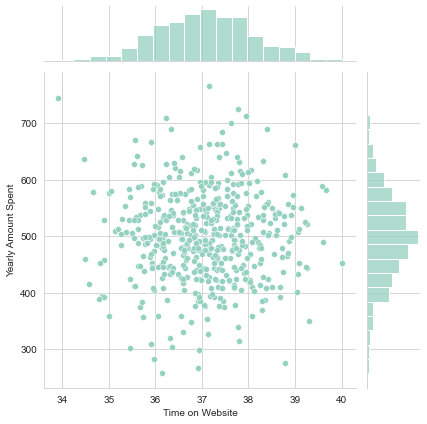

In [12]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

## Do the same but with the Time on App column instead.

### همان نمودار را در مورد زمان کار با اپلیکیشن ترسیم میکنیم
### همان طور که دیده میشود، یک رابطه معنا دار مشاهده می شود. 

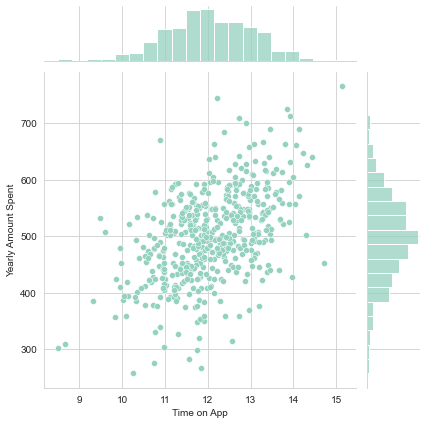

In [13]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)


### ترسیم نمودار دو بعدی و نمایش ارتباط بین زمان استفاده از اپلیکیشن و کل دلار خرج شده  


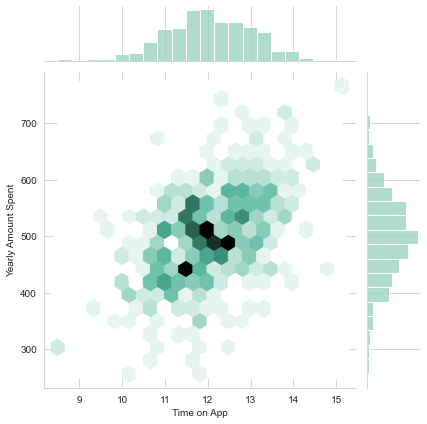

In [15]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',kind='hex',data=customers)


## Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

### ترسیم نمودار دو بعدی و نمایش ارتباط بین زمان استفاده از اپلیکیشن و قدمت مشتری


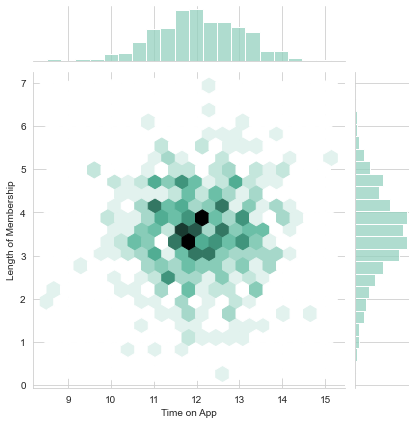

In [18]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)


### Let's explore these types of relationships across the entire data set. Use pairplot to recreate the plot below.(Don't worry about the the colors)
### با دستور فوق العاده کاربردی 
### pairplot
### تمامی روابط موجود بین پارامترها را بدست می آوریم


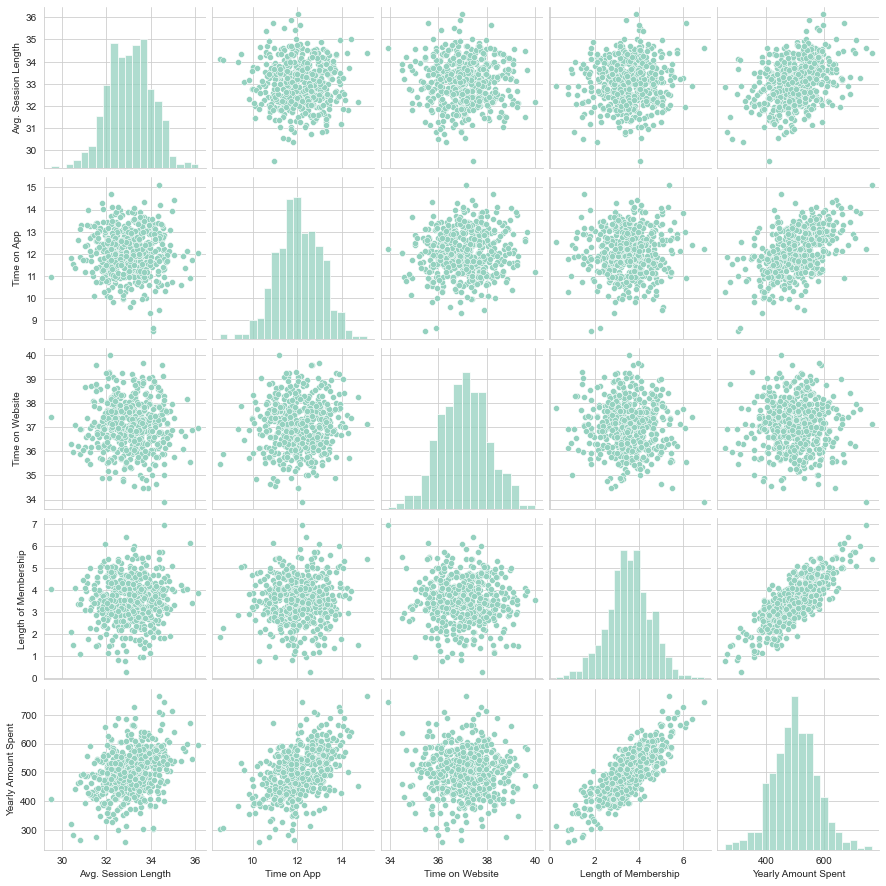

In [17]:
sns.pairplot(customers)


#### Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?
### با توجه به این نمودار میبینیم که قدمت مشتری بیشترین رابطه مستقیم را به میزان دلار خرج شده دارد


#### Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.

### با استفاده از دستور ایمپلات از کتابخانه سیبورن ، نمودار رابطه بین دلار  خرج شده   با قدمت مشتری را ترسیم میکنیم

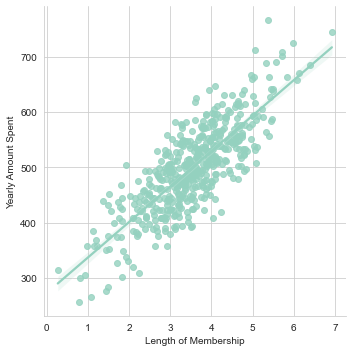

In [16]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)


### Training and Testing Data
Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. 
### حال به  سروقت دیتا برمیگردیم و آن را به دو دسته آموزش و تست تبدیل میکنیم

Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.
### از کل دیتای موجود، داده های عددی را در متغیر ایکس ریخته و دلار خرج شده سالانه را در متغیر وای میریزیم

In [21]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']


##### Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

#### از کتابخانه اسکالرن استفاده میکنیم و داده های آموزشی و تست را به نسبت 70 درصد به 30 درصد تقسیم میکنیم.




In [22]:
from sklearn.model_selection import train_test_split


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


#### Training the Model

Now its time to train our model on our training data!
Import LinearRegression from sklearn.linear_model
### میخواهیم مدلمان را آموزش بدهیم . روش انتخاب ما رگرسیون خطی است


In [24]:
from sklearn.linear_model import LinearRegression


#### Create an instance of a LinearRegression() model named lm.
### یک نام برای مدل خود انتخاب میکنیم


In [28]:
lm = LinearRegression()


##### Train/fit lm on the training data.
### مرحله فیت کردن - یعنی میگوییم ورودی و خروجی ها را ببین و یاد بگیر


In [29]:
lm.fit(X_train,y_train)


LinearRegression()

#### Print out the coefficients of the model
### ضرایب معاده را به ما نشان بده
### منظور از معادله ، همان معادله خطی است که سعی میکنیم با پیدا کردن ضرایب ، تا حد ممکن مناسب ترین آن را پیدا کنیم


In [30]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
## پیش بینی کردن با استفاده از دیتای ارزیابی کننده یا تست دیتا

Now that we have fit our model, let's evaluate its performance by predicting off the test values!
### حال که مدل را آموزش داده ایم، تمایل داریم ، دیتای تست را بعنوان ورودی بدهیم و ببینیم آیا مدل ما به درستی کار میکند یا نه

Use lm.predict() to predict off the X_test set of the data.
### از دستور داخلی خود کتابخانه برای پیش بینی استفاده میکنیم

In [31]:
predictions = lm.predict( X_test)


##### Create a scatterplot of the real test values versus the predicted values.
### حال جواب های واقعی با جوابهای پیش بینی شده را باهم روی نمودار مقایسه میکنیم


Text(0, 0.5, 'Predicted Y')

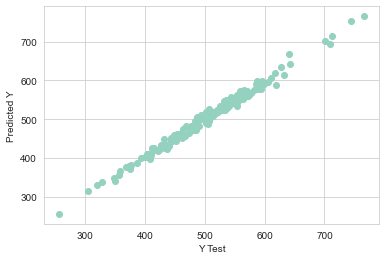

In [32]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model
## ارزیابی کردن مدل

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).
### میخواهیم عملکرد مدل خود را به طور دقیق محاسبه کنیم

## (R^2): residual sum of squares and the explained variance score .
## MAE:  Calculate the Mean Absolute Error,
## MSE: Mean Squared Error, and the 
## RMS: Root Mean Squared Error. 

Refer to the lecture or to Wikipedia for the formulas

## کتابخانه متریکس برای محاسبه دقت کاربرد دارد

In [33]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430837
MSE: 79.81305165097451
RMSE: 8.933815066978637


## Residuals
You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

C:\Users\EmPart\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


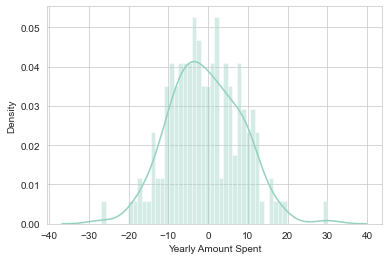

In [35]:
sns.distplot((y_test-predictions),bins=50);


## Conclusion
## نتیجه گیری

We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development?  Or maybe that doesn't even really matter, and Membership Time is what is really important.

## سوال اولیه این بود که آیا ما باید تمرکز خود را روی اپلیکیشن موبایل بگذاریم یا روی وبسایت یا اینکه هیچ تفاوتی ندارد. آیا قدمت مشتری تاثیری دارد یا نه؟ 


Let's see if we can interpret the coefficients at all to get an idea.
## میخواهیم ببینم آیا با استفاده از ضرایب بدست آمده میتوان تفسیر خوبی انجام داد یا خیر.

#### Recreate the dataframe below.
## دیتافریم زیر را  از ضرایب تشکیل میدهیم

In [34]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coeffecient
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097

##### How can you interpret these coefficients?

Interpreting the coefficients:
# تفسیر 

###### Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
## اگر تمام عوامل ثابت باشد، با یک واحد افزایش در(زمان حضور) باعث افزایش 25.98 برابری دلار خرج شده میشود.

###### Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
## اگر تمام عوامل دیگر ثابت باشد، یک واحد افزایش (زمان حضور در اپلیکیشن) باعث افزایش 38.59 دلاری میزان خرج میشود.

###### Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
## اگر تمام عوامل دیگر ثابت باشد، یک واحد افزایش (زمان حضور در وبسایت) باعث افزایش 0.19 دلاری میزان خرج میشود.

###### Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.
## اگر تمام عوامل دیگر ثابت باشد، یک واحد افزایش (قدمت مشتری) باعث افزایش 61027  دلاری میزان خرج میشود.

#### Do you think the company should focus more on their mobile app or on their website?
## به نظر شما این شرکت باید روی ارتقاء اپلیکیشن وقت بگذارد یا بهبود سایت؟

This is tricky, there are two ways to think about this: 
## به دو روش میتوان به این موضوع فکر کرد

Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. 
## بهبود وضعیت وبسایت به امید اینکه تاثیری مشابه با اپلیکیشن داشته باشد یا اینکه اپلیکیشن موجود را بهتر کرد تا نتایج بهتر شود.



This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!
## اینگوه جواب ها به عوامل متعددی نظیر هزینه و سهولت تغییرات بستگی دارد و در هر شرکت متفاوت است. همچنین تغییر یک عامل ممکن است بر روی سایر عوامل تاثیر داشته باشد.. یعنی وابستگی ضرایب ها


# پایان
## Great Job!
Congrats on your contract work! The company loved the insights! Let's move on.